In [5]:
pip install matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.5 MB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [seaborn]━━━ 6/7 [seaborn]atplotlib]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use 

In [20]:
pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 2.5 MB/s eta 0:00:00MB/s eta 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] 1/2 [statsmodels]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.0 MB/s eta 0:00:001.9 MB/s eta 0:00:01

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:04m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]━━━ 1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ruptures as rpt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [7]:
# loading the dataset
fr_data= pd.read_csv('dataset.csv')
fr_data.head()

,Dataset Name,Observation Date,Series Key,Series Display Name,Observation Value,Unit,Observation Status,Observation Status Comment,Sequence No.,Series name
0,Country-wise Workers' Remittances,30-Jun-2025,TS_GP_BOP_WR_M.WR0010,I. Cash Flow,3406.297044,Million USD,Normal,NaN,10,Total Cash inflow of Workers' remittances in P...
1,Country-wise Workers' Remittances,30-Jun-2025,TS_GP_BOP_WR_M.WR0020,......1 USA,281.188363,Million USD,Normal,NaN,20,Workers' remittances received from U.S.A.
2,Country-wise Workers' Remittances,30-Jun-2025,TS_GP_BOP_WR_M.WR0030,......2 U.K.,537.647692,Million USD,Normal,NaN,30,Workers' remittances received from U.K.
3,Country-wise Workers' Remittances,30-Jun-2025,TS_GP_BOP_WR_M.WR0040,......3 Saudi Arabia,823.174597,Million USD,Normal,NaN,40,Workers' remittances received from Saudi Arabia
4,Country-wise Workers' Remittances,30-Jun-2025,TS_GP_BOP_WR_M.WR0050,......4 U.A.E.,717.200482,Million USD,Normal,NaN,50,Workers' remittances received from U.A.E.


In [8]:
fr_data.columns

Index(['Dataset Name', 'Observation Date', 'Series Key', 'Series Display Name',
       'Observation Value', 'Unit', 'Observation Status',
       'Observation Status Comment', 'Sequence No.', 'Series name'],
      dtype='object')

In [9]:
fr_data['Observation Date']= pd.to_datetime(fr_data['Observation Date'])
# using regex on country col
fr_data['Country']= fr_data['Series Display Name'].apply(
    lambda x: re.sub(r'^\.+\d+\s*', '', x).strip()
)

pivot_df= fr_data.pivot_table(
    index= 'Observation Date',
    columns= 'Country',
    values= 'Observation Value',
    aggfunc= 'sum'
)

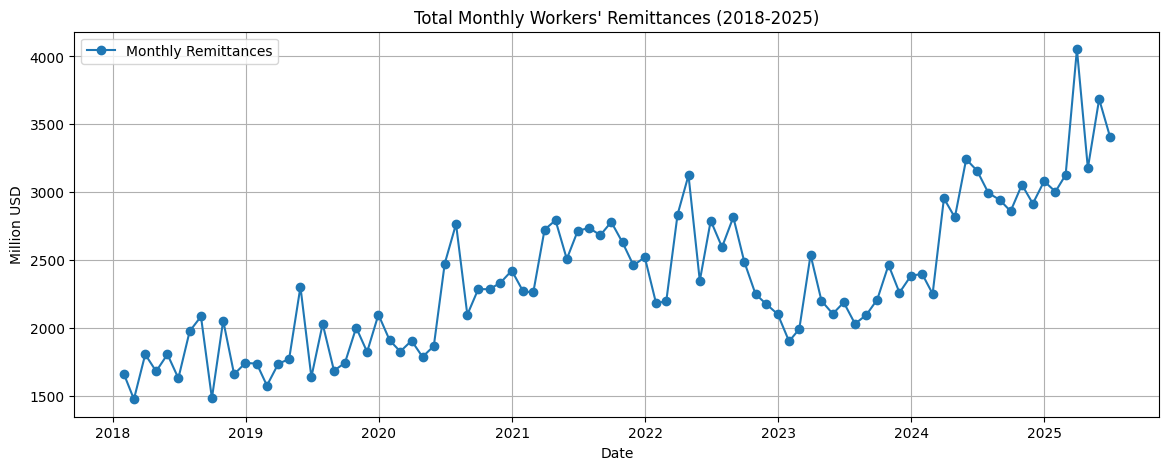

/tmp/ipykernel_6892/3657272976.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  yoy = total_df.resample('M').mean().pct_change(12)*100


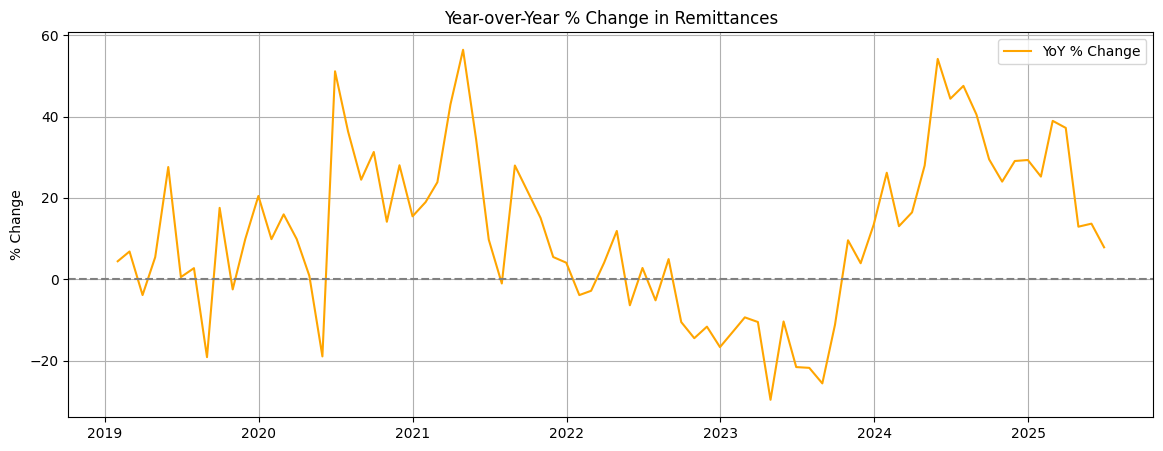

In [19]:
# overall trend from 2018 to 2025
total_df= fr_data[fr_data['Country'] == "I. Cash Flow"]
total_df= total_df[['Observation Date', 'Observation Value']].sort_values('Observation Date')
mask = (total_df['Observation Date'] >= "2018-01-01") & (total_df['Observation Date'] <= "2025-06-30")
total_df = total_df.loc[mask]
total_df.set_index('Observation Date', inplace= True)

# Plot Overall Trend
plt.figure(figsize=(14,5))
plt.plot(total_df.index, total_df['Observation Value'], marker='o', label='Monthly Remittances')
plt.title("Total Monthly Workers' Remittances (2018-2025)")
plt.xlabel("Date")
plt.ylabel("Million USD")
plt.grid(True)
plt.legend()
plt.show()

# Year-over-Year % change
yoy = total_df.resample('M').mean().pct_change(12)*100
plt.figure(figsize=(14,5))
plt.plot(yoy.index, yoy, color='orange', label='YoY % Change')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Year-over-Year % Change in Remittances")
plt.ylabel("% Change")
plt.legend()
plt.grid(True)
plt.show()


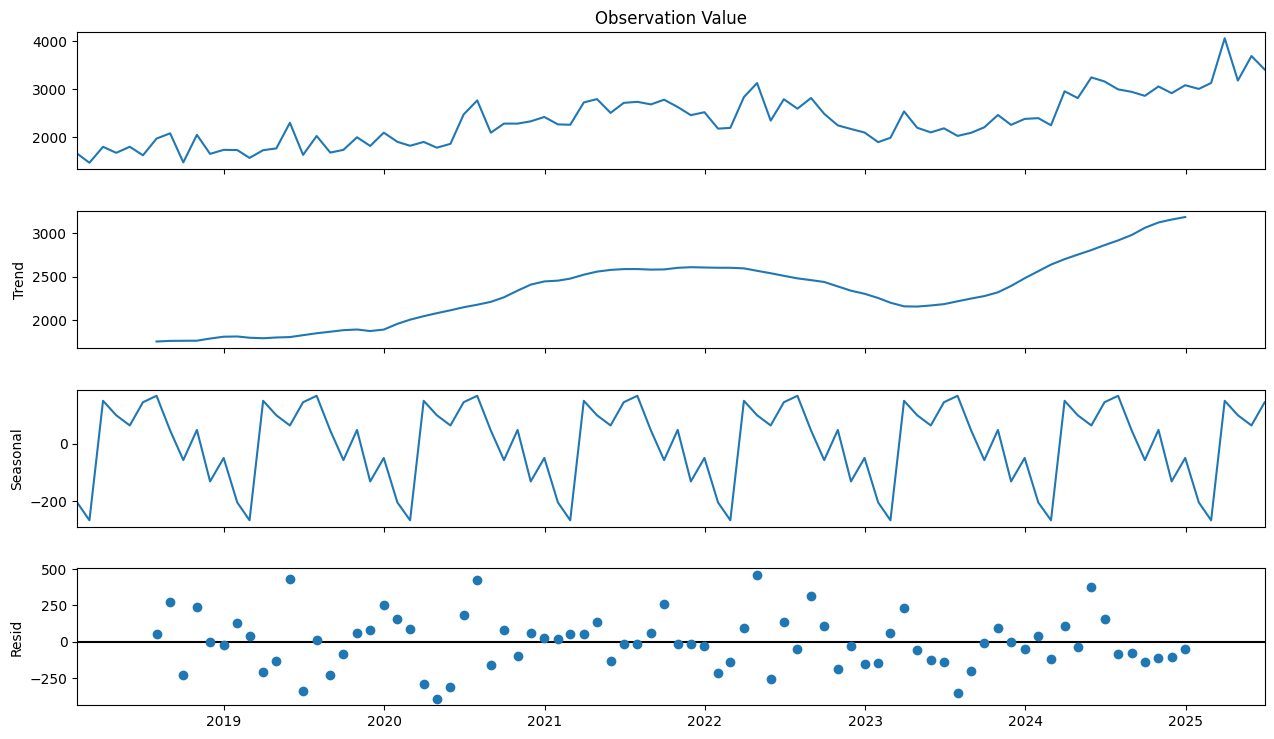

In [22]:
decomp = seasonal_decompose(total_df['Observation Value'], model='additive', period=12)
fig = decomp.plot()
fig.set_size_inches(14,8)
plt.show()

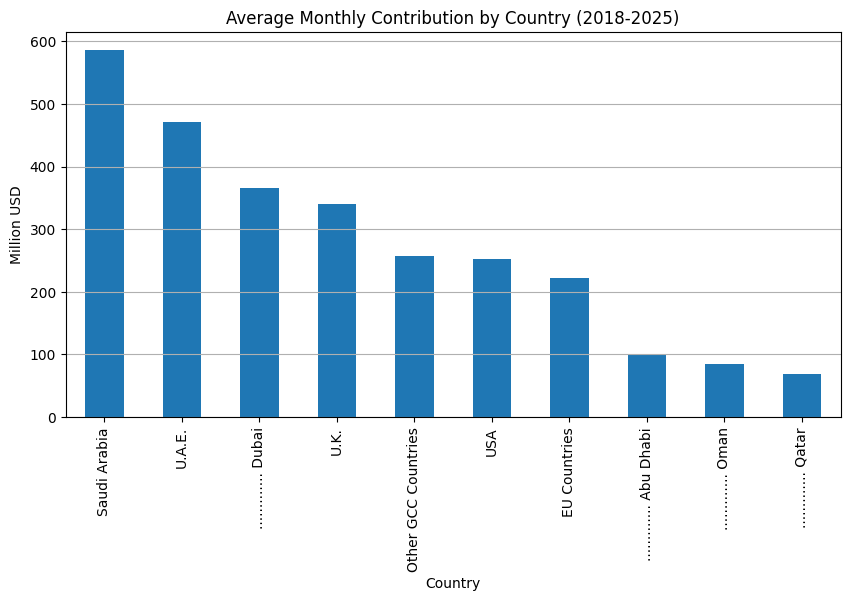

In [30]:
# analysis on countries
country_df= fr_data[
    (~fr_data['Country'].isin(["I. Cash Flow", ". Total (I+II)",
                               "II. Encashment and Profit in Pak. Rs. of Foreign Exchange Bearer Certificates (FEBCs) & Foreign Currency Bearer Certificates (FCBCs)"]))
]
country_df= country_df[['Observation Date', 'Country', 'Observation Value']]
country_df= country_df[(country_df['Observation Date'] >= "2018-01-01") & (country_df['Observation Date'] <= "2025-06-30")]
# average contribution by countries
avg_cont= (country_df.groupby('Country')['Observation Value']).mean().sort_values(ascending= False)
# Plot top 10 contributors
plt.figure(figsize=(10,5))
avg_cont.head(10).plot(kind='bar')
plt.title("Average Monthly Contribution by Country (2018-2025)")
plt.ylabel("Million USD")
plt.grid(axis='y')
plt.show()

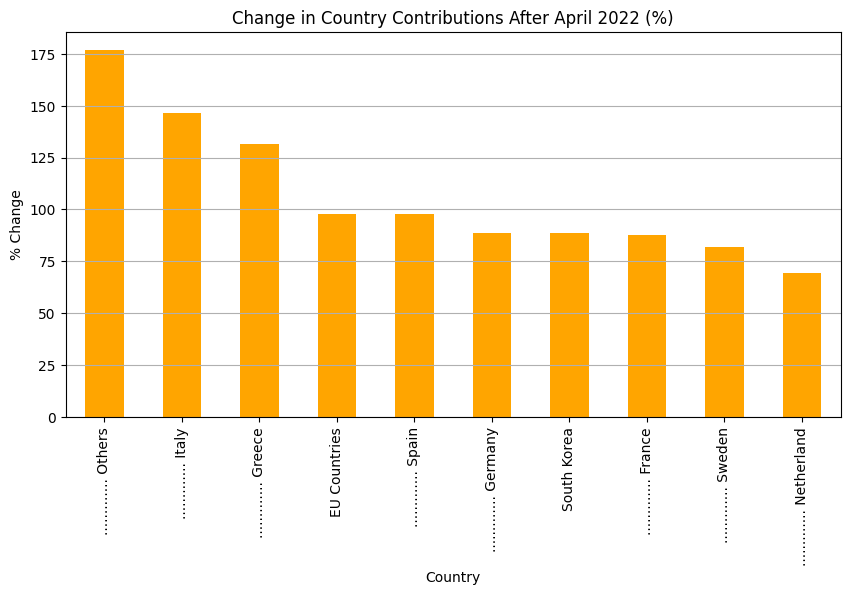

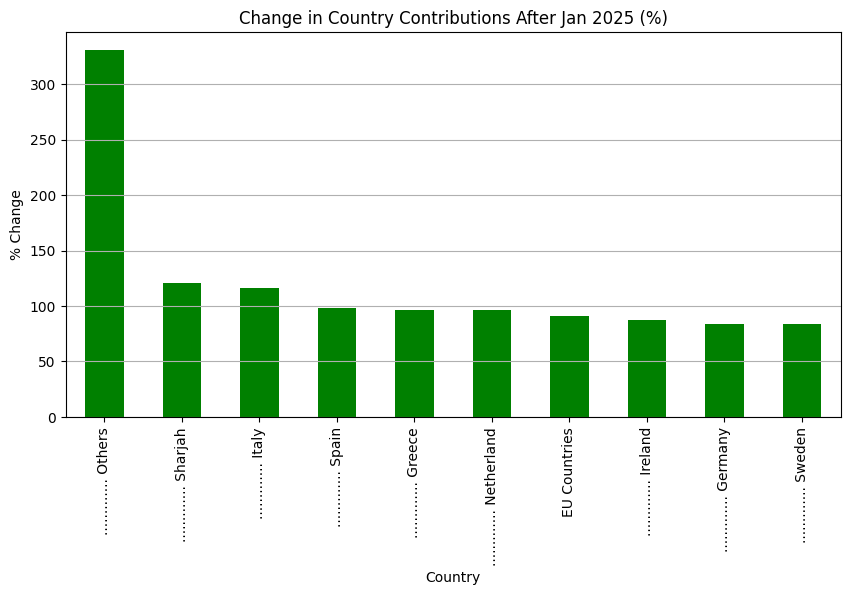

In [31]:
# The aim of this project is to mainly assess the situation of the topic post 2022, so let's dive into it.
pre_2022= country_df[country_df['Observation Date'] < '2022-04-01']
post_2022= country_df[country_df['Observation Date'] >= '2022-04-01']

mean_pre_2022 = pre_2022.groupby('Country')['Observation Value'].mean()
mean_post_2022 = post_2022.groupby('Country')['Observation Value'].mean()

change_2022 = ((mean_post_2022 - mean_pre_2022) / mean_pre_2022) * 100
change_2022 = change_2022.sort_values(ascending=False)

plt.figure(figsize=(10,5))
change_2022.head(10).plot(kind='bar', color='orange')
plt.title("Change in Country Contributions After April 2022 (%)")
plt.ylabel("% Change")
plt.grid(axis='y')
plt.show()

# Changes after Jan 2025
pre_2025 = country_df[country_df['Observation Date'] < "2025-01-01"]
post_2025 = country_df[country_df['Observation Date'] >= "2025-01-01"]

mean_pre_2025 = pre_2025.groupby('Country')['Observation Value'].mean()
mean_post_2025 = post_2025.groupby('Country')['Observation Value'].mean()

change_2025 = ((mean_post_2025 - mean_pre_2025) / mean_pre_2025) * 100
change_2025 = change_2025.sort_values(ascending=False)

plt.figure(figsize=(10,5))
change_2025.head(10).plot(kind='bar', color='green')
plt.title("Change in Country Contributions After Jan 2025 (%)")
plt.ylabel("% Change")
plt.grid(axis='y')
plt.show()

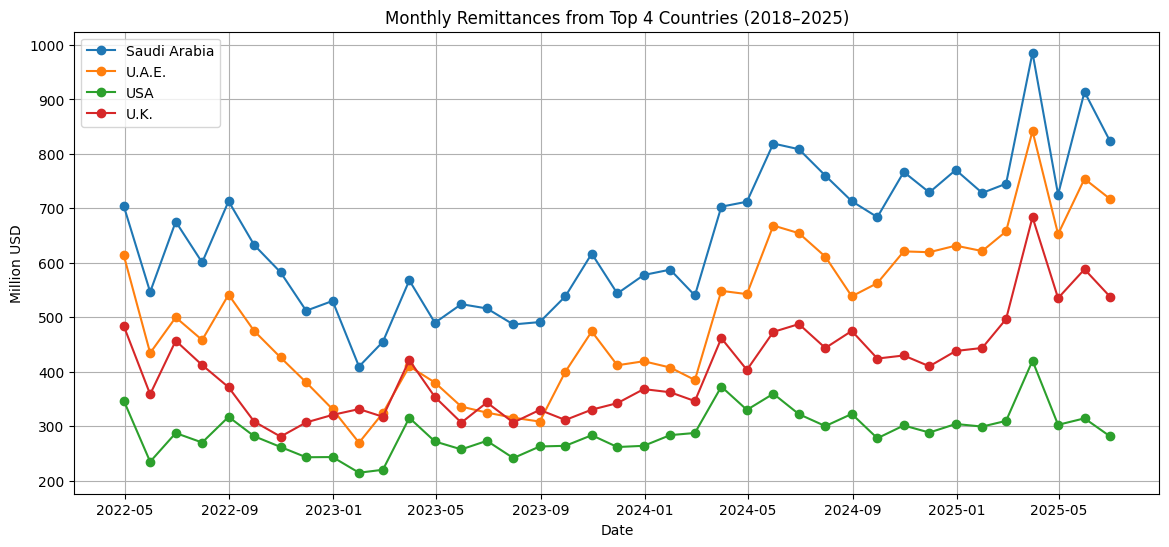

In [34]:
# comparison on top 4
country_df = fr_data[
    (~fr_data['Country'].isin([
        "I. Cash Flow",
        ". Total (I+II)",
        "II. Encashment and Profit in Pak. Rs. of Foreign Exchange Bearer Certificates (FEBCs) & Foreign Currency Bearer Certificates (FCBCs)"
    ]))
]
country_df = country_df[(country_df['Observation Date'] >= "2022-04-01") &
                        (country_df['Observation Date'] <= "2025-06-30")]

pivot_df = country_df.pivot_table(index='Observation Date',
                                  columns='Country',
                                  values='Observation Value',
                                  aggfunc='sum').sort_index()

top4 = ["Saudi Arabia", "U.A.E.", "USA", "U.K."]
available_top4 = [c for c in top4 if c in pivot_df.columns]

# --- Plot time-series for top 4 countries ---
plt.figure(figsize=(14,6))
for country in available_top4:
    plt.plot(pivot_df.index, pivot_df[country], marker='o', label=country)

plt.title("Monthly Remittances from Top 4 Countries (2018–2025)")
plt.xlabel("Date")
plt.ylabel("Million USD")
plt.legend()
plt.grid(True)
plt.show()

Pre-RDA mean: 1742.25 Million USD
Post-RDA mean: 2505.65 Million USD
Change after RDA: 43.82%


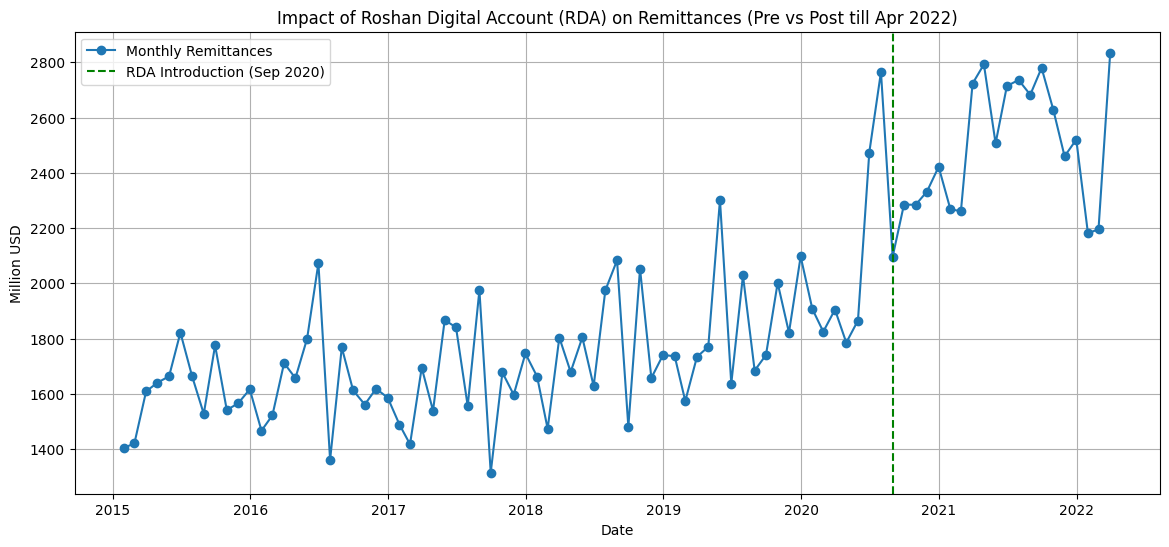

In [38]:
total_df= fr_data[fr_data['Country'] == "I. Cash Flow"]
total_df= total_df[['Observation Date', 'Observation Value']].sort_values('Observation Date')
mask = (total_df['Observation Date'] >= "2015-01-01") & (total_df['Observation Date'] <= "2025-06-30")
total_df = total_df.loc[mask]
total_df.set_index('Observation Date', inplace= True)

# roshan digital account impacted the flow of remittance post 2020
pre_rda = total_df[total_df.index < "2020-09-01"]
post_rda = total_df[(total_df.index >= "2020-09-01") & (total_df.index <= "2022-04-01")]

mean_pre_rda = pre_rda['Observation Value'].mean()
mean_post_rda = post_rda['Observation Value'].mean()
change_percent = ((mean_post_rda - mean_pre_rda) / mean_pre_rda) * 100

print(f"Pre-RDA mean: {mean_pre_rda:.2f} Million USD")
print(f"Post-RDA mean: {mean_post_rda:.2f} Million USD")
print(f"Change after RDA: {change_percent:.2f}%")

plot_df = total_df[total_df.index <= "2022-04-01"]
plt.figure(figsize=(14,6))
plt.plot(plot_df.index, plot_df['Observation Value'], marker='o', label="Monthly Remittances")
plt.axvline(pd.to_datetime("2020-09-01"), color='green', linestyle='--', label="RDA Introduction (Sep 2020)")
plt.title("Impact of Roshan Digital Account (RDA) on Remittances (Pre vs Post till Apr 2022)")
plt.xlabel("Date")
plt.ylabel("Million USD")
plt.legend()
plt.grid(True)
plt.show()


Pre-PTI Exit Mean (before Apr 2022): 1908.97 Million USD
Post-PTI Exit Mean (Apr 2022 - Dec 2024): 2650.96 Million USD
Change after PTI exit: 38.87%

Top Countries Change After April 2022:
Country
............. Others        170.438647
............. Italy         143.302079
............. Greece        129.080914
EU Countries                 95.761306
............. Spain          95.337729
South Korea                  87.705550
............. Germany        86.881977
............. France         86.242076
............. Sweden         80.111092
............. Netherland     66.885787
Name: Observation Value, dtype: float64


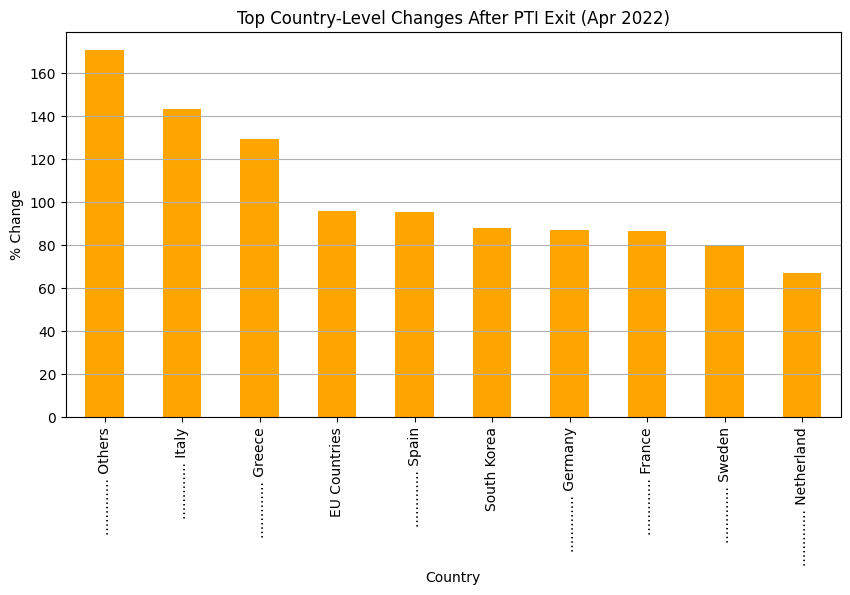

In [39]:
# this is the heart of my analysis
pre_pti_exit = total_df[total_df.index < "2022-04-01"]
post_pti_exit = total_df[(total_df.index >= "2022-04-01") & (total_df.index < "2025-06-30")]

mean_pre = pre_pti_exit['Observation Value'].mean()
mean_post = post_pti_exit['Observation Value'].mean()
change_percent = ((mean_post - mean_pre) / mean_pre) * 100

print(f"Pre-PTI Exit Mean (before Apr 2022): {mean_pre:.2f} Million USD")
print(f"Post-PTI Exit Mean (Apr 2022 - Dec 2024): {mean_post:.2f} Million USD")
print(f"Change after PTI exit: {change_percent:.2f}%")

country_df = fr_data[
    (~fr_data['Country'].isin(["I. Cash Flow",". Total (I+II)",
                               "II. Encashment and Profit in Pak. Rs. of Foreign Exchange Bearer Certificates (FEBCs) & Foreign Currency Bearer Certificates (FCBCs)"])) &
    (fr_data['Observation Date'] >= "2018-01-01") &
    (fr_data['Observation Date'] <= "2025-12-31")
]

pre_country = country_df[country_df['Observation Date'] < "2022-04-01"].groupby('Country')['Observation Value'].mean()
post_country = country_df[(country_df['Observation Date'] >= "2022-04-01") & (country_df['Observation Date'] < "2025-06-30")].groupby('Country')['Observation Value'].mean()
change_country = ((post_country - pre_country) / pre_country * 100).sort_values(ascending=False)

print("\nTop Countries Change After April 2022:")
print(change_country.head(10))

plt.figure(figsize=(10,5))
change_country.head(10).plot(kind='bar', color='orange')
plt.title("Top Country-Level Changes After PTI Exit (Apr 2022)")
plt.ylabel("% Change")
plt.grid(axis='y')
plt.show()


Detected significant change points: DatetimeIndex(['2015-06-30', '2015-11-30', '2016-04-30', '2016-09-30',
               '2017-02-28', '2017-07-31', '2017-12-31', '2018-05-31',
               '2018-10-31', '2019-03-31', '2019-08-31', '2020-01-31',
               '2020-06-30', '2020-11-30', '2021-04-30', '2021-09-30',
               '2022-02-28', '2022-07-31', '2022-12-31', '2023-05-31',
               '2023-10-31', '2024-03-31', '2024-08-31', '2025-01-31'],
              dtype='datetime64[ns]', name='Observation Date', freq=None)

Average monthly remittance before Dec 2024: 2073.03 Million USD
Average monthly remittance after Dec 2024:  3361.83 Million USD
Change after IK statement: 62.17%


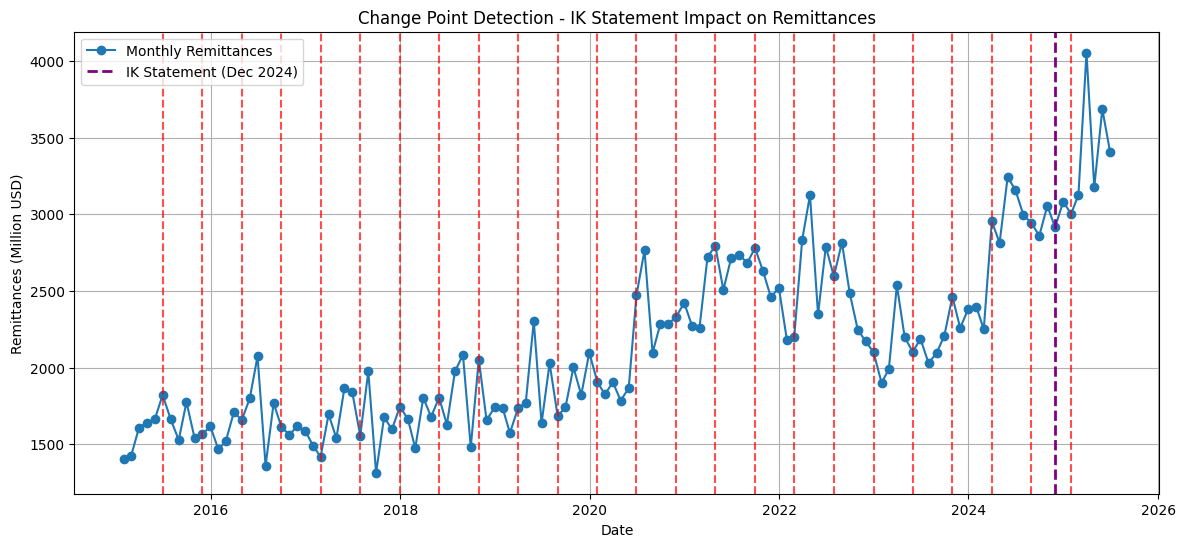

In [50]:
pti_fr_block = total_df[total_df.index <= pd.to_datetime("2025-06-30")]

signal = pti_fr_block['Observation Value'].values

model = rpt.Pelt(model="l2").fit(signal)
breaks = model.predict(pen=100)   # <-- higher penalty = fewer, more significant breaks
break_dates = pti_fr_block.index[breaks[:-1]]
print("Detected significant change points:", break_dates)

# Pre vs Post IK Statement
ik_event_month = pd.to_datetime("2024-12-01")
pre = pti_fr_block[pti_fr_block.index < ik_event_month]['Observation Value'].mean()
post = pti_fr_block[pti_fr_block.index >= ik_event_month]['Observation Value'].mean()
change_percent = ((post - pre) / pre) * 100

print(f"\nAverage monthly remittance before Dec 2024: {pre:.2f} Million USD")
print(f"Average monthly remittance after Dec 2024:  {post:.2f} Million USD")
print(f"Change after IK statement: {change_percent:.2f}%")

plt.figure(figsize=(14,6))
plt.plot(pti_fr_block.index, pti_fr_block['Observation Value'], marker='o', label="Monthly Remittances")

for bd in break_dates:
    plt.axvline(bd, color='red', linestyle='--', alpha=0.7)

plt.axvline(ik_event_month, color='purple', linestyle='--', linewidth=2, label="IK Statement (Dec 2024)")

plt.title("Change Point Detection - IK Statement Impact on Remittances")
plt.xlabel("Date")
plt.ylabel("Remittances (Million USD)")
plt.legend()
plt.grid(True)
plt.show()

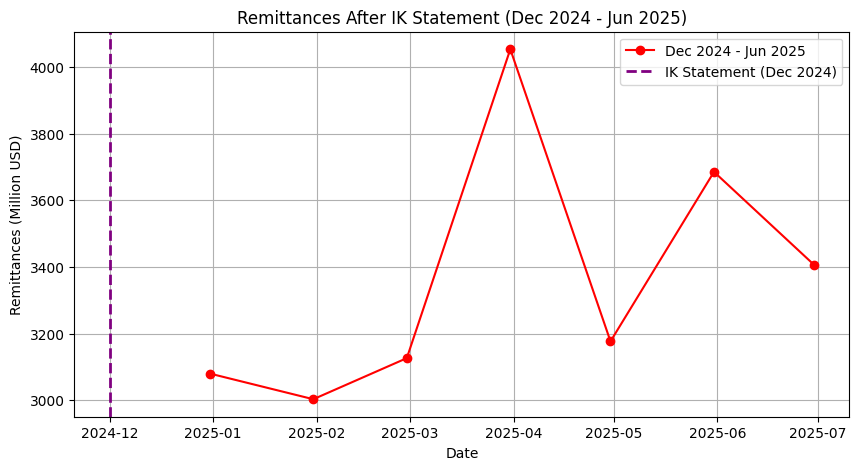

In [52]:
# Define event month
ik_event_month = pd.to_datetime("2024-12-01")

# Filter data starting from Dec 2024 to June 2025
dec2024_onwards = pti_fr_block[(pti_fr_block.index >= ik_event_month) & (pti_fr_block.index <= "2025-06-30")]

# Plot
plt.figure(figsize=(10,5))
plt.plot(dec2024_onwards.index, dec2024_onwards['Observation Value'], marker='o', color='red', label="Dec 2024 - Jun 2025")

# Mark Dec 2024 explicitly
plt.axvline(ik_event_month, color='purple', linestyle='--', linewidth=2, label="IK Statement (Dec 2024)")
plt.title("Remittances After IK Statement (Dec 2024 - Jun 2025)")
plt.xlabel("Date")
plt.ylabel("Remittances (Million USD)")
plt.legend()
plt.grid(True)
plt.show()


In [55]:
# model part

In [65]:
print(fr_data.columns)
print(fr_data.shape)
print(fr_data.head())


Index(['Dataset Name', 'Observation Date', 'Series Key', 'Series Display Name',
       'Observation Value', 'Unit', 'Observation Status',
       'Observation Status Comment', 'Sequence No.', 'Series name', 'Country'],
      dtype='object')
(21756, 11)
                        Dataset Name Observation Date             Series Key  \
0  Country-wise Workers' Remittances       2025-06-30  TS_GP_BOP_WR_M.WR0010   
1  Country-wise Workers' Remittances       2025-06-30  TS_GP_BOP_WR_M.WR0020   
2  Country-wise Workers' Remittances       2025-06-30  TS_GP_BOP_WR_M.WR0030   
3  Country-wise Workers' Remittances       2025-06-30  TS_GP_BOP_WR_M.WR0040   
4  Country-wise Workers' Remittances       2025-06-30  TS_GP_BOP_WR_M.WR0050   

    Series Display Name  Observation Value         Unit Observation Status  \
0          I. Cash Flow        3406.297044  Million USD             Normal   
1           ......1 USA         281.188363  Million USD             Normal   
2          ......2 U.K.         5

In [74]:
df = fr_data.copy()

# Keep existing 'Country' column, don't overwrite it
df['Observation Date'] = pd.to_datetime(df['Observation Date'])
df = df.rename(columns={'Observation Value': 'Remittance'})

# Drop unnecessary columns
df = df.drop(columns=['Series name'], errors='ignore')

df = df.sort_values(['Country', 'Observation Date'])
df = df.sort_values(['Country', 'Observation Date'])
df['lag1'] = df.groupby('Country')['Remittance'].shift(1)
df['lag2'] = df.groupby('Country')['Remittance'].shift(2)
df['rolling3'] = df.groupby('Country')['Remittance'].rolling(3).mean().reset_index(level=0, drop=True)

# Drop only rows where we actually have lag/rolling values
df = df.dropna(subset=['lag1', 'lag2', 'rolling3'])

print("After feature engineering:", df.shape)

# function to detect summary rows
def is_summary(country):
    patterns = [
        r'^\. ',                  # rows starting with dot (like ". Total (I+II)")
        r'^(I|II|III)\.',         # Roman numeral headings like "I. Cash Flow"
        r'(?i)others?',           # 'Others' or 'Other GCC Countries'
        r'EU Countries'           # aggregated region
    ]
    return any(re.search(p, country) for p in patterns)

# apply filter
df= df[~df['Country'].apply(is_summary)].copy()

# --- Feature Engineering ---
# Lag features
for lag in [1, 2, 3, 6]:
    df[f'lag_{lag}'] = df.groupby('Country')['Remittance'].shift(lag)

# Rolling mean
df['rolling_3'] = df.groupby('Country')['Remittance'].transform(lambda x: x.rolling(3).mean())
df['rolling_6'] = df.groupby('Country')['Remittance'].transform(lambda x: x.rolling(6).mean())

# Time-based features
df['month'] = df['Observation Date'].dt.month
df['year'] = df['Observation Date'].dt.year

# Encode country
df['country_code'] = df['Country'].astype('category').cat.codes
# remove leading dots/spaces and normalize names
df['Country'] = df['Country'].str.replace(r'^\.+\s*', '', regex=True).str.strip()


# --- Train-Test Split (last 6 months as test) ---
cutoff_date = "2025-01-01"
train = df[df['Observation Date'] < cutoff_date]
test = df[df['Observation Date'] >= cutoff_date]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

features = ['lag_1','lag_2','lag_3','lag_6','rolling_3','rolling_6','month','year','country_code']
X_train = train[features]
y_train = train['Remittance']
X_test = test[features]
y_test = test['Remittance']

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# --- Model ---
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# --- Evaluation ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

# # --- Plot ---
# plt.figure(figsize=(12,5))
# plt.plot(test['Observation Date'], y_test.values, label="Actual", marker='o')
# plt.plot(test['Observation Date'], y_pred, label="Predicted", marker='x')
# plt.legend()
# plt.title("XGBoost Remittance Forecast (Test Period)")
# plt.xlabel("Date")
# plt.ylabel("Remittance (Million USD)")
# plt.grid(True)
# plt.show()

# --- Next Month Forecast (July 2025) ---
latest = df.groupby('Country').tail(1).copy()
latest['month'] = 7  # forecast for July
latest['year'] = 2025

# shift lag values forward (simulate next month input)
latest['lag_1'] = latest['Remittance']
latest['lag_2'] = latest['lag_1']
latest['lag_3'] = latest['lag_2']
latest['lag_6'] = latest['lag_3']
latest['rolling_3'] = latest['lag_1'].rolling(3, min_periods=1).mean()
latest['rolling_6'] = latest['lag_1'].rolling(6, min_periods=1).mean()

forecast = model.predict(latest[features])
latest['Forecast_July2025'] = forecast

print(latest[['Country','Forecast_July2025']])


After feature engineering: (21132, 13)
Train shape: (16556, 22)
Test shape: (174, 22)
Train shape: (16556, 9) (16556,)
Test shape: (174, 9) (174,)
Test RMSE: 42.61
         Country  Forecast_July2025
6      Abu Dhabi         188.299759
10       Bahrain         143.870636
24       Belgium         116.970604
22       Denmark          46.955135
5          Dubai         132.439713
16        France         235.547791
15       Germany         248.685349
20        Greece          84.644844
23       Ireland          68.046310
19         Italy          67.309578
11        Kuwait          73.931717
17    Netherland          91.679039
13          Oman          42.375950
12         Qatar          59.744087
7        Sharjah          99.006264
18         Spain          38.289761
21        Sweden          54.857208
28     Australia          40.030155
29        Canada          43.313217
30         Japan          64.212669
25      Malaysia          44.139572
26        Norway          17.579779
3   Saud

In [75]:

def get_forecast_input(df):
    rows = []
    for country, g in df.groupby('Country'):
        g = g.sort_values('Observation Date')
        last = g.iloc[-1]  # last available observation
        row = {
            'Country': country,
            'lag_1': g.iloc[-1]['Remittance'],
            'lag_2': g.iloc[-2]['Remittance'] if len(g) > 1 else g.iloc[-1]['Remittance'],
            'lag_3': g.iloc[-3]['Remittance'] if len(g) > 2 else g.iloc[-1]['Remittance'],
            'lag_6': g.iloc[-6]['Remittance'] if len(g) > 5 else g.iloc[-1]['Remittance'],
            'rolling_3': g['Remittance'].tail(3).mean(),
            'rolling_6': g['Remittance'].tail(6).mean(),
            'month': 7,       # forecast month
            'year': 2025,     # forecast year
            'country_code': last['country_code']
        }
        rows.append(row)
    return pd.DataFrame(rows)

latest = get_forecast_input(df)
forecast = model.predict(latest[features])
latest['Forecast_July2025'] = forecast

print(latest[['Country', 'Forecast_July2025']])


         Country  Forecast_July2025
0      Abu Dhabi         168.668488
1      Australia          72.264526
2        Bahrain          44.621910
3        Belgium          17.244278
4         Canada          59.469624
5        Denmark           7.177160
6          Dubai         579.906189
7         France          53.683376
8        Germany          69.182663
9         Greece          46.732819
10       Ireland          19.994390
11         Italy         112.757965
12         Japan           5.244513
13        Kuwait          67.492104
14      Malaysia          13.763572
15    Netherland           8.390518
16        Norway          12.007333
17          Oman         123.819656
18         Qatar          85.602089
19  Saudi Arabia         694.823914
20       Sharjah           7.955546
21  South Africa          27.913643
22   South Korea          11.301017
23         Spain          70.043777
24        Sweden           9.437955
25   Switzerland           4.755555
26        U.A.E.         643